In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import pandas as pd

In [2]:
n_point = 25
x = np.linspace(1,10, n_point)
u = npr.normal(0,8*x, n_point)
b1=2
b2=5
y = b1+b2*x+u

In [3]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()

In [4]:
ypred = res.predict(df['x'])

In [5]:
res.params

Intercept   -10.498603
x             6.552213
dtype: float64

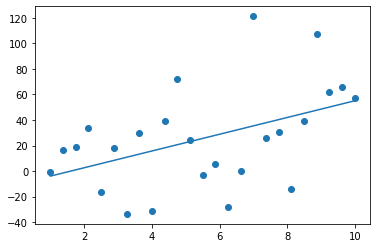

In [6]:
plt.scatter(x,y)
plt.plot(x,ypred)

### Pair Bootstrap

In [7]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()
ypred = res.predict(df['x'])

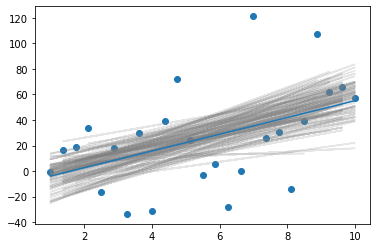

In [8]:
b1_pair = []
b2_pair = []

n_boot=100

plt.figure()

for i in range(n_boot):
    sample_df = df.sample(n=n_point, replace=True) 
    ols_boot = sm.ols(formula='y~x', data=sample_df)
    res_boot = ols_boot.fit()
    
    b1_pair.append(res_boot.params[0])
    b2_pair.append(res_boot.params[1])
    
    ypred_boot = res_boot.predict(sample_df['x'])
    plt.plot(sample_df['x'], ypred_boot, color='grey', alpha=0.2)


plt.scatter(x,y)
plt.plot(x,ypred)   

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

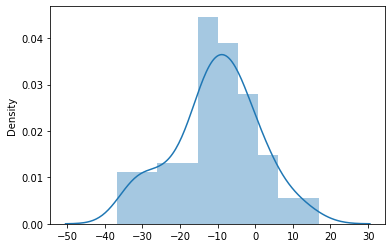

In [10]:
sns.distplot(b1_pair)

In [11]:
np.percentile(b1_pair,[2.5,97.5])

array([-32.95654872,  11.09485497])

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

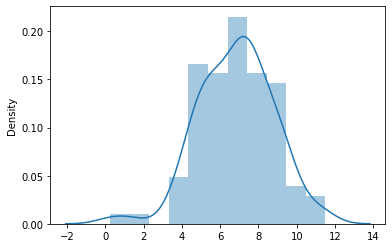

In [12]:
sns.distplot(b2_pair)

In [13]:
np.percentile(b2_pair,[2.5,97.5])

array([ 3.61519585, 10.39251415])

In [16]:
np.mean(b1_pair), np.mean(b2_pair)

(-10.471399260620057, 6.830542276979911)

### Bootstrapping Residuals

In [38]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()
ypred = res.predict(df['x'])
residuals = res.resid

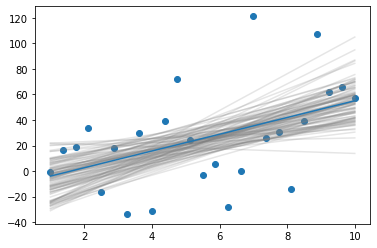

In [39]:
b1_res = []
b2_res = []

n_boot=100

plt.figure()

for i in range(n_boot):
    
    boot_res = npr.choice(residuals, n_point, replace=True)
    y_boot = ypred + boot_res
    
    sample_df = pd.DataFrame({'x':x,'y':y_boot})
    ols_boot = sm.ols(formula='y~x', data=sample_df)
    res_boot = ols_boot.fit()
    
    b1_res.append(res_boot.params[0])
    b2_res.append(res_boot.params[1])
    
    ypred_boot = res_boot.predict(sample_df['x'])
    plt.plot(sample_df['x'], ypred_boot, color='grey', alpha=0.2)

plt.scatter(x,y)
plt.plot(x,ypred)   

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

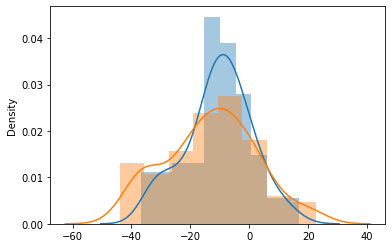

In [40]:
sns.distplot(b1_pair)
sns.distplot(b1_res)

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

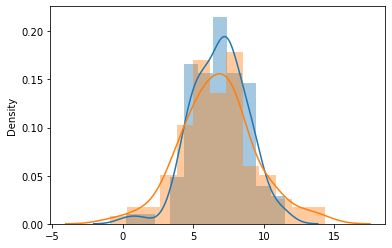

In [41]:
sns.distplot(b2_pair)
sns.distplot(b2_res)

### Wild Bootstrap

In [22]:
df = pd.DataFrame({'x':x,'y':y})
ols = sm.ols(formula='y~x', data=df)
res = ols.fit()
ypred = res.predict(df['x'])
residuals = res.resid


In [24]:
X = pd.DataFrame({'a':np.repeat(1,n_point),'b':x})

In [30]:
h_weights = np.diag(np.matmul(np.matmul(X,np.linalg.inv(np.matmul(X.T, X))),X.T))

<ipython-input-30-8fb1f88cf8df>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  h_weights = np.diag(np.matmul(np.matmul(X,np.linalg.inv(np.matmul(X.T, X))),X.T))


In [46]:
t = (residuals-np.mean(residuals))/np.std(residuals)

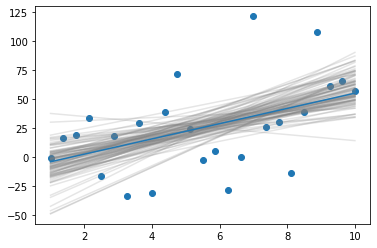

In [51]:
b1_res2 = []
b2_res2 = []

n_boot=100

plt.figure()

for i in range(n_boot):
    
    boot_res = npr.choice(residuals, n_point, replace=True)
    t_boot = npr.choice(t, n_point, replace=True)
        
    y_boot = ypred + t_boot*boot_res/np.sqrt(1-h_weights)
    
    sample_df = pd.DataFrame({'x':x,'y':y_boot})
    ols_boot = sm.ols(formula='y~x', data=sample_df)
    res_boot = ols_boot.fit()
    
    b1_res2.append(res_boot.params[0])
    b2_res2.append(res_boot.params[1])
    
    ypred_boot = res_boot.predict(sample_df['x'])
    plt.plot(sample_df['x'], ypred_boot, color='grey', alpha=0.2)

plt.scatter(x,y)
plt.plot(x,ypred)   

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

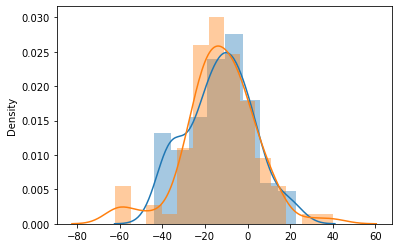

In [52]:
sns.distplot(b1_res)
sns.distplot(b1_res2)

/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/xenakas/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

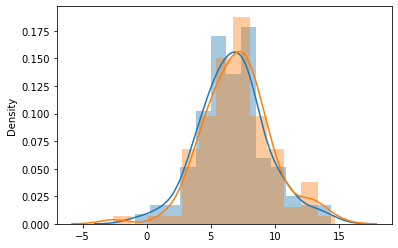

In [54]:
sns.distplot(b2_res)
sns.distplot(b2_res2)